In [3]:
from simulator import Simulator
from turbStats import tilt_mat, corr_mat
import matplotlib.pyplot as plt
import torch
import glob
import numpy as np
from PIL import Image
import cv2
import os

In [4]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('CPU')
device

device(type='cuda', index=0)

In [5]:

width = 436
height = 436
strength = 5

In [6]:
# Generate correlation matrix for tilt. Do this once for each different turbulence parameter. 
tilt_mat(width, 0.1, 0.02, 3000)
print('Tilt Map generated')

Tilt Map generated


In [7]:
Folder = 'G:/Research/Turbulence/RAFT/RAFT/datasets/Sintel-perfect_ratio/**/*.png'
Existing = 'Sintel-perfect_ratio'
NewFolder = 'Sintel-perfect_ratio-Tur'

In [8]:
imgList = [a.replace('\\', '/') for a in glob.glob('G:/Research/Turbulence/RAFT/RAFT/datasets/Sintel-perfect_ratio/**/*.png', recursive=True)]
x = plt.imread(imgList[0])

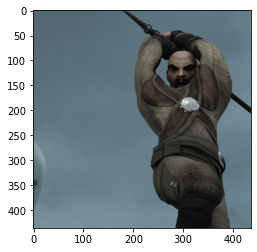

(436, 436, 3)


In [11]:
plt.imshow(x)
plt.show()
print(x.shape)

In [12]:
print('Now Start processing each Imges')
from tqdm import tqdm
for aimg in tqdm(imgList):
    x = plt.imread(aimg)
    x = (x*255).astype(np.float32)
    # x = (x*255).astype(np.int8)
    #print(x.shape[0], width)
    
    if x.shape[0]!=width:
        x = cv2.resize(x, (height,width), interpolation=cv2.INTER_CUBIC)
    
    if len(x.shape) == 3: 
        x = x.transpose((2,0,1))
    x = torch.tensor(x, device = device, dtype=torch.float32)
    
    # Simulate
    simulator = Simulator(strength, width).to(device, dtype=torch.float32)
    
    out = simulator(x).detach().cpu().numpy()
    
    if len(out.shape) == 3: 
        out = out.transpose((1,2,0))
    
    print('Output Image max and shape = ',out.min(), out.max(), out.shape, end='')
    
    out = np.clip(out, 0, 255)
        
    out /= 256
    print('\t\tChanged to = ',out.min(), out.max())    
    # save image
    NewFolderName = aimg.replace(Existing, NewFolder).rsplit('/', 1)[0]
    os.makedirs(NewFolderName, exist_ok=True)
    plt.imsave(aimg.replace(Existing, NewFolder))
    break

Now Start processing each Imges


  0%|          | 0/6402 [00:24<?, ?it/s]


AttributeError: module 'torch' has no attribute 'ifft'

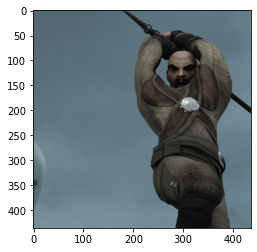

In [27]:
x = plt.imread(aimg)
y = (x*255).astype(np.uint)
plt.imshow(x)

In [22]:
t = torch.tensor([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [27]:
torch.fft.ifft(t)

tensor([0.+0.j, 1.+0.j, 2.+0.j, 3.+0.j])